# Import Library

In [ ]:
# Import libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Load Dataset

In [ ]:
# Load dataset
url = "SaYoPillow.csv"
df = pd.read_csv(url)

In [ ]:
df = df[["snoring rate","respiration rate","body temperature","limb movement", "blood oxygen", "eye movement", "sleeping hours", "heart rate"]]
df.head(25)

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
5,56.880,19.376,95.376,9.376,94.064,83.44,6.376,58.44
6,47.000,16.800,97.200,5.600,95.800,68.00,7.800,52.00
7,50.000,18.000,99.000,8.000,97.000,80.00,9.000,55.00
8,45.280,16.112,96.168,4.224,95.112,61.12,7.112,50.28
9,55.520,19.104,95.104,9.104,93.656,82.76,6.104,57.76


##Normalisasi

In [ ]:
df.shape

(630, 8)

In [ ]:
df.isnull().sum()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

col = df.columns
res = mms.fit_transform(df)
data = pd.DataFrame(res, columns=col)
# x[0:5]

In [ ]:
data.head(10)

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143
5,0.216000,0.241143,0.741143,0.358400,0.804267,0.520889,0.708444,0.241143
6,0.036364,0.057143,0.871429,0.106667,0.920000,0.177778,0.866667,0.057143
7,0.090909,0.142857,1.000000,0.266667,1.000000,0.444444,1.000000,0.142857
8,0.005091,0.008000,0.797714,0.014933,0.874133,0.024889,0.790222,0.008000
9,0.191273,0.221714,0.721714,0.340267,0.777067,0.505778,0.678222,0.221714


In [ ]:
df.head(10)

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76


In [ ]:
f1 = data['snoring rate'].values
f2 = data['respiration rate'].values
f3 = data['body temperature'].values
f4 = data['limb movement'].values
f5 = data['blood oxygen'].values
f6 = data['eye movement'].values
f7 = data['sleeping hours'].values
f8 = data['heart rate'].values

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi Method
encoder = LabelEncoder()

# Looping
for c in data.columns[0:]:  
    if(data[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        data[c] = encoder.fit_transform(data[c])
    else: # else get the self column value without encode
        data[c] = data[c]

# Clustering

In [ ]:
# Menentukan nilai yang tepat untuk cluster
X = np.array(list(zip(f1, f2, f3, f4, f5, f6, f7, f8))).reshape(len(f1), 8)
# print(X)
SSE = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  SSE.append(kmeanModel.inertia_)

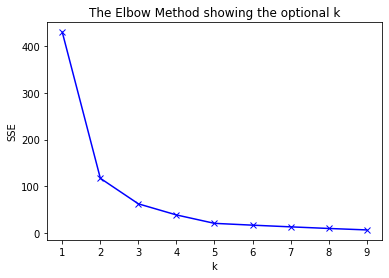

In [ ]:
# Plot nilai K untuk mencari elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optional k')
plt.show()

In [ ]:
# Melakukan clustering
from sklearn.cluster import KMeans

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# Fitting input data
kmeans = kmeans.fit(X)

# Mendapatkan cluster labels
labels = kmeans.predict(X)

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
y_kmeans = kmeans.fit_predict(X)
# Mencetak nilai centroid
print(C)

[[0.92761848 0.79271194 0.26872131 0.88931148 0.2945224  0.91938798
  0.0537122  0.79271194]
 [0.11363636 0.14285714 0.80357143 0.23333333 0.85       0.36111111
  0.77777778 0.14285714]
 [0.54513007 0.40991648 0.50935385 0.52233846 0.54206359 0.71667692
  0.27267009 0.40991648]]


In [ ]:
data['Cluster'] = y_kmeans

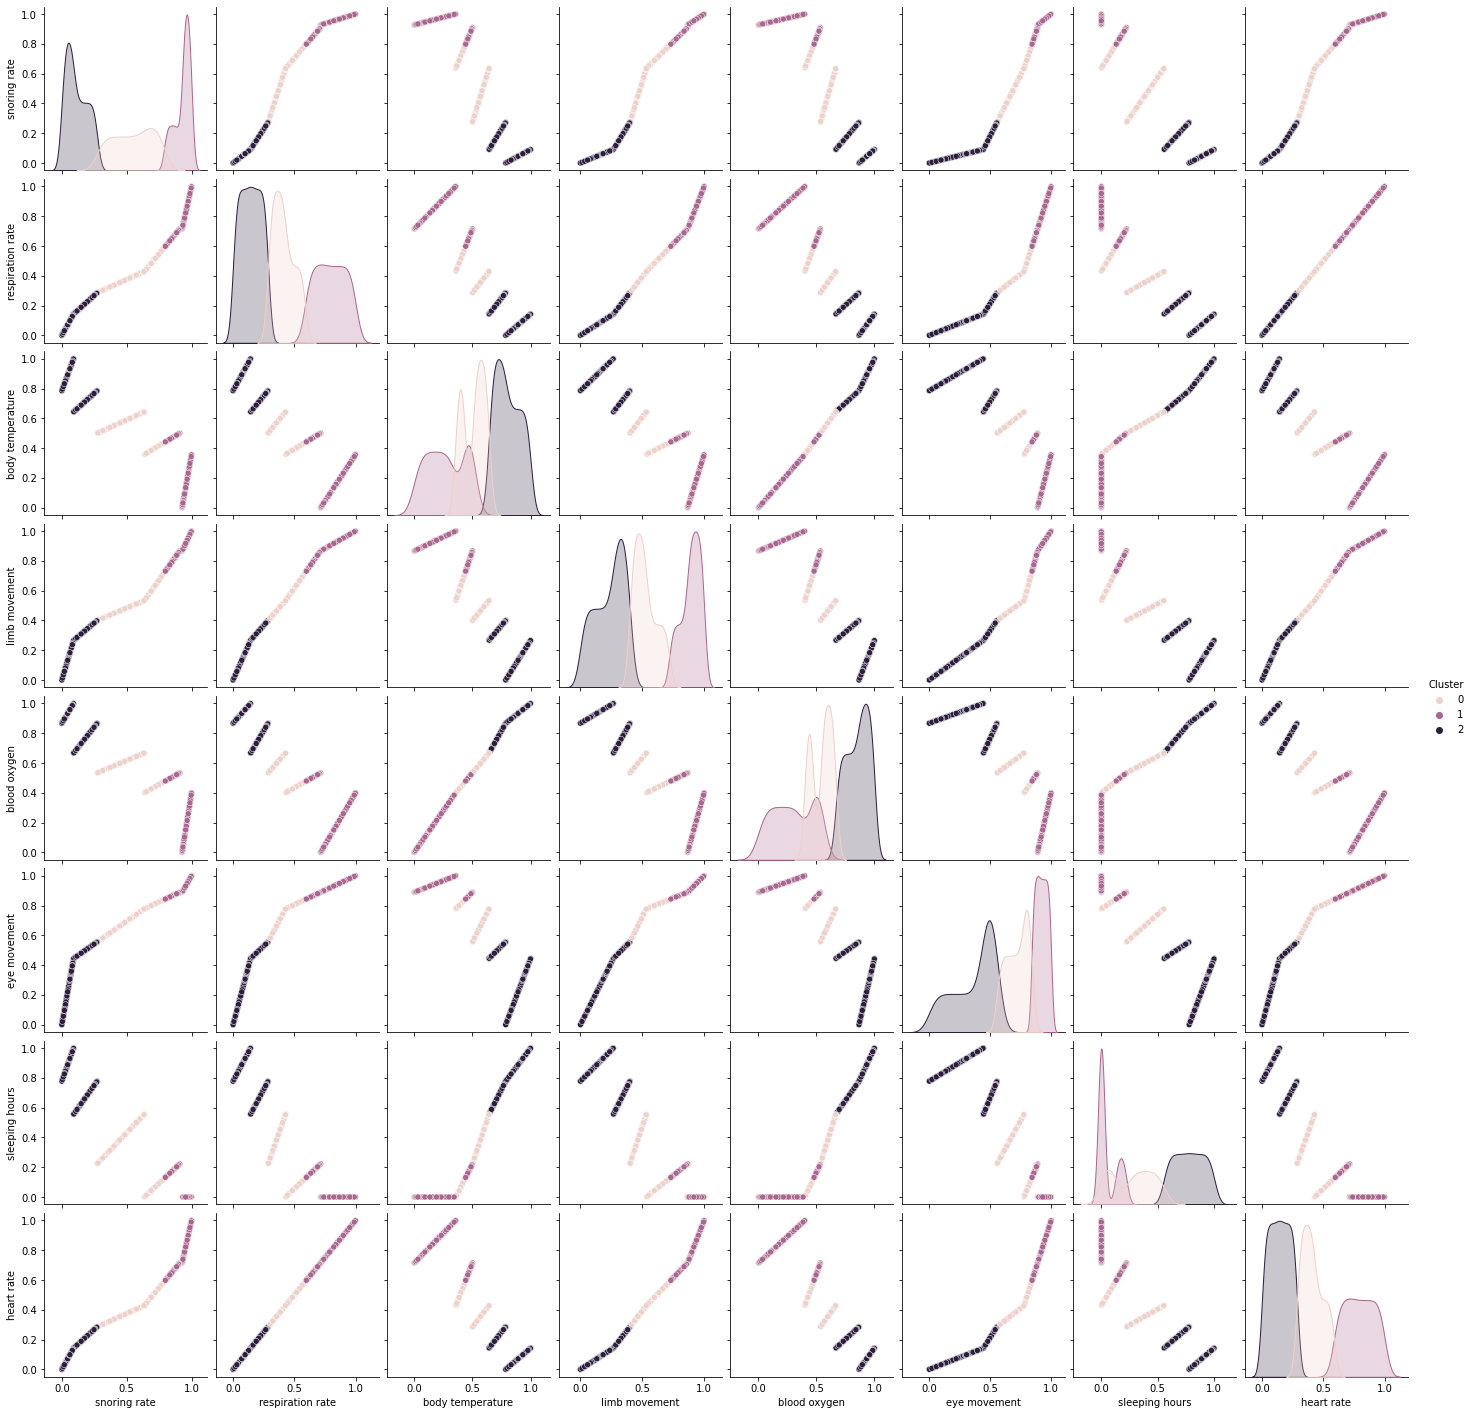

In [ ]:
sns.pairplot(data, hue='Cluster')
plt.show()

In [ ]:
data.head(10)

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,Cluster
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,1
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,1
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,2
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,0
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,2
5,0.216000,0.241143,0.741143,0.358400,0.804267,0.520889,0.708444,0.241143,2
6,0.036364,0.057143,0.871429,0.106667,0.920000,0.177778,0.866667,0.057143,2
7,0.090909,0.142857,1.000000,0.266667,1.000000,0.444444,1.000000,0.142857,2
8,0.005091,0.008000,0.797714,0.014933,0.874133,0.024889,0.790222,0.008000,2
9,0.191273,0.221714,0.721714,0.340267,0.777067,0.505778,0.678222,0.221714,2


In [ ]:
# Data type of the Cluster column
data['Cluster'].dtype

dtype('int32')

In [ ]:
data['Cluster'].unique()

array([1, 2, 0], dtype=int32)

In [ ]:
import pickle
scaler = MinMaxScaler().fit(df)

pickle.dump(kmeans, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))